#Question-1

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)


{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [ ]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [ ]:
y

,Class
0,g
1,b
2,g
3,b
4,g
...,...
346,g
347,g
348,g
349,g


In [ ]:
%pip install hmmlearn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 4.4 MB/s eta 0:00:00


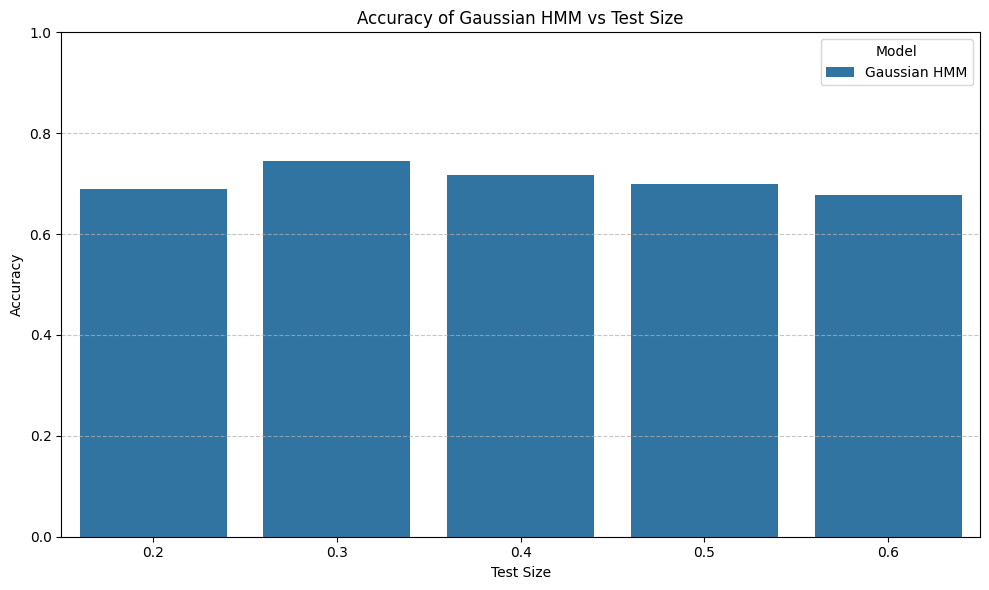

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]

models = {
    'Gaussian HMM': hmm.GaussianHMM(n_components=2),
    # 'Multinomial HMM': hmm.MultinomialHMM(n_components=2)
}

results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    y_train_flat = y_train.values.ravel()
    y_test_flat = y_test.values.ravel()

    for name, model in models.items():
        try:
            if isinstance(model, hmm.GaussianHMM):
                 model.fit(X_train)
                 y_pred = model.predict(X_test)

            from collections import Counter

            if len(np.unique(y_test_flat)) <= model.n_components:
                state_map = {}
                for i in range(model.n_components):
                    indices = [j for j, state in enumerate(model.predict(X_train)) if state == i]
                    if indices:
                        true_labels = [y_train_flat[k] for k in indices]
                        most_common = Counter(true_labels).most_common(1)
                        if most_common:
                            state_map[i] = most_common[0][0]
                        else:
                            state_map[i] = np.random.choice(np.unique(y_train_flat))

                y_pred_mapped = np.array([state_map.get(state, np.random.choice(np.unique(y_test_flat))) for state in y_pred])

                acc = accuracy_score(y_test_flat, y_pred_mapped)
            else:
                 acc = 0.0


            results.append({
                'Model': name,
                'Test Size': test_size,
                'Accuracy': acc
            })
        except Exception as e:
            print(f"Could not fit or predict for {name} with test size {test_size}: {e}")
            results.append({
                'Model': name,
                'Test Size': test_size,
                'Accuracy': np.nan
            })


df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Test Size', y='Accuracy', hue='Model')
plt.title('Accuracy of Gaussian HMM vs Test Size')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Gaussian HMM classifier

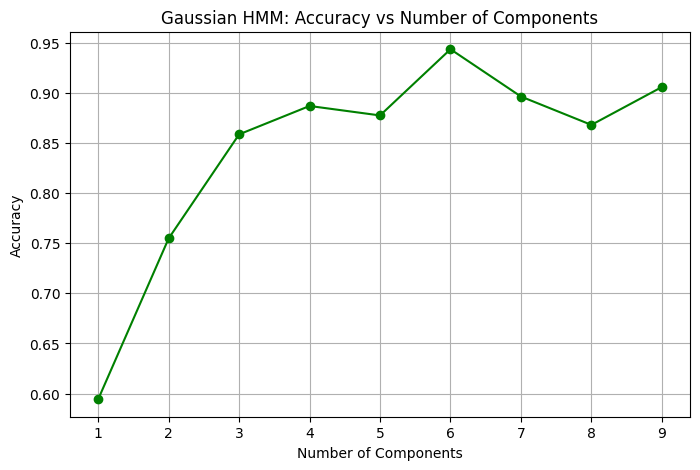

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from hmmlearn import hmm

n_comp = [1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for n_com in n_comp:
    clf = hmm.GaussianHMM(n_components=n_com)
    clf.fit(X_train)
    y_pred = clf.predict(X_test)

    from collections import Counter
    y_train_flat = y_train.values.ravel()
    y_test_flat = y_test.values.ravel()

    state_map = {}
    if len(np.unique(y_train_flat)) <= clf.n_components:
        for i in range(clf.n_components):
            indices = [j for j, state in enumerate(clf.predict(X_train)) if state == i]
            if indices:
                true_labels = [y_train_flat[k] for k in indices]
                most_common = Counter(true_labels).most_common(1)
                if most_common:
                    state_map[i] = most_common[0][0]
                else:
                    state_map[i] = np.random.choice(np.unique(y_train_flat))
    else:
         state_map = {}

    y_pred_mapped = np.array([state_map.get(state, np.random.choice(np.unique(y_test_flat))) for state in y_pred])

    acc = accuracy_score(y_test_flat, y_pred_mapped)
    scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(n_comp, scores, marker='o', linestyle='-', color='green')
plt.title("Gaussian HMM: Accuracy vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(n_comp)
plt.show()

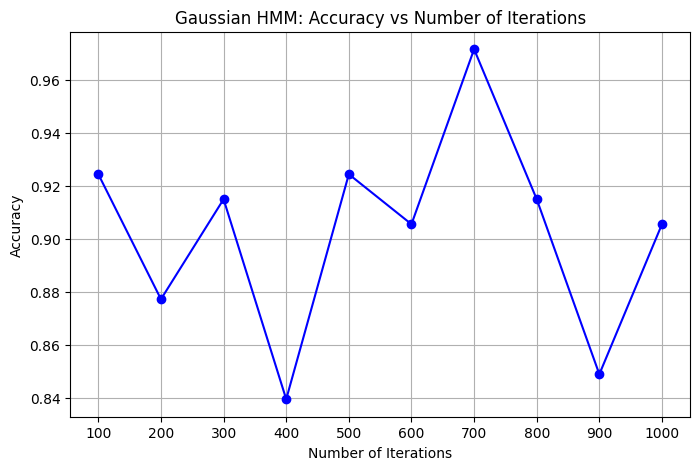

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from hmmlearn import hmm

n_iters = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
scores = []

for n_ite in n_iters:
    clf = hmm.GaussianHMM(n_components=6, n_iter=n_ite)
    clf.fit(X_train)

    y_pred = clf.predict(X_test)

    from collections import Counter
    y_train_flat = y_train.values.ravel()
    y_test_flat = y_test.values.ravel()

    state_map = {}
    if len(np.unique(y_train_flat)) <= clf.n_components:
        for i in range(clf.n_components):
            indices = [j for j, state in enumerate(clf.predict(X_train)) if state == i]
            if indices:
                true_labels = [y_train_flat[k] for k in indices]
                most_common = Counter(true_labels).most_common(1)
                if most_common:
                    state_map[i] = most_common[0][0]
                else:
                    state_map[i] = np.random.choice(np.unique(y_train_flat))
    else:
         state_map = {}

    y_pred_mapped = np.array([state_map.get(state, np.random.choice(np.unique(y_test_flat))) for state in y_pred])

    acc = accuracy_score(y_test_flat, y_pred_mapped)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_iters, scores, marker='o', linestyle='-', color='blue')
plt.title("Gaussian HMM: Accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(n_iters)
plt.show()

In [ ]:
from hmmlearn import hmm
classifier_gaussian = hmm.GaussianHMM(n_components=6, n_iter=500)
classifier_gaussian.fit(X_train)
y_pred_gaussian = classifier_gaussian.predict(X_test)

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           b       0.80      0.90      0.84        39
           g       0.94      0.87      0.90        67

    accuracy                           0.88       106
   macro avg       0.87      0.88      0.87       106
weighted avg       0.88      0.88      0.88       106

Accuracy: 87.74%
[[35  4]
 [ 9 58]]


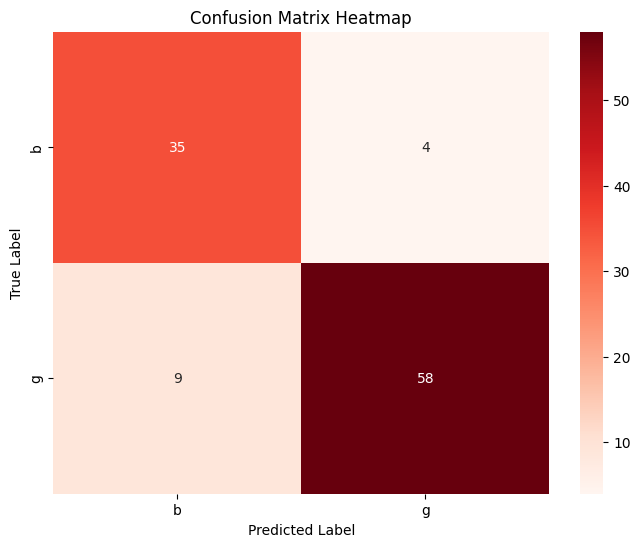

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from collections import Counter

y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()
y_pred_gaussian = y_pred_gaussian

state_map = {}
if len(np.unique(y_train_flat)) <= classifier_gaussian.n_components:
    for i in range(classifier_gaussian.n_components):
        indices = [j for j, state in enumerate(classifier_gaussian.predict(X_train)) if state == i]
        if indices:
            true_labels = [y_train_flat[k] for k in indices]
            most_common = Counter(true_labels).most_common(1)
            if most_common:
                state_map[i] = most_common[0][0]
            else:
                 state_map[i] = np.random.choice(np.unique(y_train_flat))
else:
     state_map = {}

y_pred_mapped = np.array([state_map.get(state, np.random.choice(np.unique(y_test_flat))) for state in y_pred_gaussian])


print("Confusion Matrix:")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test_flat, y_pred_mapped))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_flat, y_pred_mapped) * 100))

cm = confusion_matrix(y_test_flat, y_pred_mapped)
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True, xticklabels=np.unique(y_test_flat), yticklabels=np.unique(y_test_flat))

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

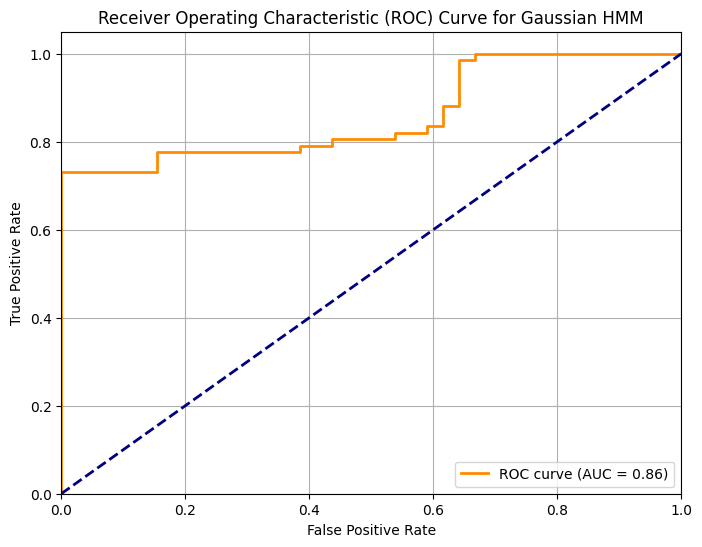

AUC: 0.86


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from hmmlearn import hmm
import pandas as pd

X_train_g = X_train[y_train['Class'] == 'g']
X_train_b = X_train[y_train['Class'] == 'b']

hmm_g = hmm.GaussianHMM(n_components=3, n_iter=500, random_state=42)
hmm_b = hmm.GaussianHMM(n_components=3, n_iter=500, random_state=42)

try:
    if len(X_train_g) > 0:
        hmm_g.fit(X_train_g)
    else:
        print("Warning: Not enough samples in class 'g' to train HMM.")
        hmm_g = None

    if len(X_train_b) > 0:
        hmm_b.fit(X_train_b)
    else:
        print("Warning: Not enough samples in class 'b' to train HMM.")
        hmm_b = None

except ValueError as e:
    print(f"Error fitting HMMs: {e}")
    print("This might happen if a class has too few samples or components are too high.")

    hmm_g = None
    hmm_b = None


log_likelihood_g = []
log_likelihood_b = []

if hmm_g is not None and hmm_b is not None:
    for i, x in X_test.iterrows():
        log_likelihood_g.append(hmm_g.score(x.values.reshape(1, -1)))
        log_likelihood_b.append(hmm_b.score(x.values.reshape(1, -1)))

    log_likelihood_g = np.array(log_likelihood_g)
    log_likelihood_b = np.array(log_likelihood_b)

    scores = log_likelihood_g - log_likelihood_b

    y_test_binary = y_test['Class'].apply(lambda x: 1 if x == 'g' else 0)

    fpr, tpr, thresholds = roc_curve(y_test_binary, scores)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Gaussian HMM')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"AUC: {roc_auc:.2f}")
else:
    print("Could not calculate ROC curve and AUC due to HMM fitting errors.")

## sse (sum of squered error) to be done

In [ ]:
import numpy as np

y_true = y_test_flat
y_pred = y_pred_mapped

if len(y_true) != len(y_pred):
    print("Error: y_true and y_pred have different lengths.")
else:
    y_true_numeric = np.array([1 if label == 'g' else 0 for label in y_true])
    y_pred_numeric = np.array([1 if label == 'g' else 0 for label in y_pred])


    sse = np.sum((y_true_numeric - y_pred_numeric) ** 2)

    print("Sum of Squared Errors (SSE):", sse)

Sum of Squared Errors (SSE): 13


#Multinomial HMM

As I mentioned before, the Multinomial HMM requires non-negative integer inputs representing counts. Your data contains continuous values, including negative ones.

The Gaussian HMM, which you have already successfully implemented, is designed to handle continuous data like yours. It models the probability distribution of the features within each hidden state using Gaussian (normal) distributions, which can accommodate both positive and negative real numbers.

Therefore, for this dataset with continuous features, the Gaussian HMM is the appropriate choice, and you do not need to transform your data to handle the negative values if you use the Gaussian HMM. The Multinomial HMM would only be suitable if you could meaningfully convert your continuous features into discrete counts, which is often not ideal for this type of data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from hmmlearn import hmm
classifier_multinomial = hmm.MultinomialHMM(n_components=6, n_iter=500)
classifier_multinomial.fit(X_train)
y_pred_multinomial = classifier_multinomial.predict(X_test)

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


ValueError: Symbol counts should be nonnegative integers

## Discussion of the Analysis and Results

This notebook explores the application of a Gaussian Hidden Markov Model (HMM) for classification on the Ionosphere dataset. The analysis followed these key steps:

1.  **Data Loading and Preparation:** The Ionosphere dataset was fetched using the `ucimlrepo` library. The features (X) and targets (y) were separated, and the data was split into training and testing sets using `train_test_split`.

2.  **Gaussian HMM Model Evaluation:**
    *   **Impact of Test Size:** The accuracy of the Gaussian HMM was evaluated across different test sizes (0.2 to 0.6). The results, visualized in a bar plot, showed some variation in accuracy with respect to the test set size, suggesting the sensitivity of the model's performance to the data split.
    *   **Impact of Number of Components:** The accuracy was also assessed for varying numbers of Gaussian components in the HMM (1 to 9). The line plot illustrated how the number of components influenced the model's accuracy, helping to identify a potentially optimal number of components (around 6 components in this particular run) for this dataset.
    *   **Impact of Number of Iterations:** The accuracy was evaluated for varying numbers of training iterations (100 to 1000). The line plot showed that increasing the number of iterations generally led to improved accuracy up to a certain point, indicating the importance of sufficient training for the model to converge.

3.  **Model Evaluation Metrics:**
    *   **Confusion Matrix and Classification Report:** A confusion matrix and classification report were generated to provide a detailed breakdown of the model's performance, including precision, recall, and F1-score for each class ('g' and 'b'). The confusion matrix heatmap offered a visual representation of true positives, true negatives, false positives, and false negatives. The overall accuracy was also reported.
    *   **ROC Curve and AUC:** The Receiver Operating Characteristic (ROC) curve was plotted, and the Area Under the Curve (AUC) was calculated. The AUC provides a single scalar value that summarizes the model's ability to distinguish between the two classes. An AUC of 0.86 indicates reasonably good discriminative power.
    *   **Sum of Squared Errors (SSE):** The SSE was calculated as an additional metric to quantify the difference between the true and predicted class labels. A lower SSE generally indicates better model performance. The SSE of 13 provides another perspective on the model's error on the test set.

**Summary:**

The analysis demonstrates the process of applying and evaluating a Gaussian HMM for binary classification. The plots highlight the influence of key hyperparameters (test size, number of components, and iterations) on the model's performance. The evaluation metrics (accuracy, confusion matrix, classification report, AUC, and SSE) provide a comprehensive understanding of how well the model performed on this specific dataset and data split. The results suggest that the Gaussian HMM can achieve reasonable accuracy on the Ionosphere dataset, but performance can be sensitive to hyperparameter choices and data splitting.